In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# import CSV
df = pd.read_csv(os.path.join("Resources", "ufc-master.csv"))
df = df.fillna(df.mean())

df.head()

D:\Users\lynel\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889


In [3]:
# Assign X (data) and y (target)

X = df[['B_ev','R_odds','R_ev','B_odds','B_kd_bout','R_tot_str_landed_bout', 'R_sig_str_pct_bout','B_tot_str_landed_bout', 'B_pass_bout',  'B_sig_str_landed_bout', 'B_sig_str_pct_bout', 'R_kd_bout','R_pass_bout','R_fighter',  'R_sig_str_landed_bout', 'date', 'R_tot_str_attempted_bout',  'B_fighter',  'R_avg_SIG_STR_pct', 'B_td_pct_bout',  'R_avg_TD_pct', 'sig_str_dif','R_avg_TD_landed', 'B_avg_SIG_STR_pct','B_avg_SIG_STR_landed' , 'age_dif', 'B_tot_str_attempted_bout','R_avg_SIG_STR_landed','avg_td_dif','location','B_age','B_td_landed_bout','R_age',  'reach_dif',  'total_round_dif', 'B_avg_TD_landed','B_sig_str_attempted_bout', 'R_sig_str_attempted_bout']]

y = df["Winner"]

print(X.shape, y.shape)


(4566, 38) (4566,)


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
non_numeric = [i for i in X.columns if X[i].dtypes == 'object']
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

for i in X[non_numeric]:
    X[i] = label_encoder.fit_transform(X[i].astype(str))

D:\Users\lynel\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=1)

### Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
logr_classifier = LogisticRegression(max_iter=1000)
logr_classifier

LogisticRegression(max_iter=1000)

In [8]:
logr_classifier.fit(X_train, y_train)

D:\Users\lynel\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [9]:
print(f"Training Data Score: {logr_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {logr_classifier.score(X_test, y_test)}")

Training Data Score: 0.773072429906542
Testing Data Score: 0.7723292469352014


In [10]:
pred_logr = logr_classifier.predict(X_test)
print(f"First 10 Predictions:   {pred_logr[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 0 1 0 0 0 1]
First 10 Actual labels: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [11]:
pd.DataFrame({"Prediction": pred_logr, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1137,1,1
1138,0,1
1139,0,0
1140,0,0


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_logr))

0.7723292469352014


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_logr)) # returns precision recall f1-score and support
print(confusion_matrix(y_test, pred_logr)) # returns the exact number of TN FP FN TP

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       471
           1       0.77      0.87      0.82       671

    accuracy                           0.77      1142
   macro avg       0.77      0.75      0.76      1142
weighted avg       0.77      0.77      0.77      1142

[[301 170]
 [ 90 581]]


### K Nearest Neighbor Model

k: 1, Train/Test Score: 1.000/0.584
k: 3, Train/Test Score: 0.805/0.597
k: 5, Train/Test Score: 0.755/0.625
k: 7, Train/Test Score: 0.731/0.629
k: 9, Train/Test Score: 0.724/0.634
k: 11, Train/Test Score: 0.711/0.638
k: 13, Train/Test Score: 0.705/0.642
k: 15, Train/Test Score: 0.699/0.630
k: 17, Train/Test Score: 0.699/0.643
k: 19, Train/Test Score: 0.693/0.646
k: 21, Train/Test Score: 0.693/0.640
k: 23, Train/Test Score: 0.692/0.655
k: 25, Train/Test Score: 0.691/0.655
k: 27, Train/Test Score: 0.686/0.650
k: 29, Train/Test Score: 0.685/0.653


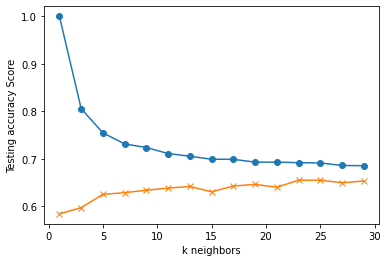

In [15]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 31, 2), train_scores, marker='o')
plt.plot(range(1, 31, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

print(accuracy_score(y_test, pred_knn))

0.6304728546409807


In [17]:
print(classification_report(y_test, pred_knn)) # returns precision recall f1-score and support
print(confusion_matrix(y_test, pred_knn)) # returns the exact number of TN FP FN TP

              precision    recall  f1-score   support

           0       0.56      0.49      0.52       471
           1       0.67      0.73      0.70       671

    accuracy                           0.63      1142
   macro avg       0.62      0.61      0.61      1142
weighted avg       0.62      0.63      0.63      1142

[[231 240]
 [182 489]]


In [ ]:
### Support Vector Machine